In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data = pd.read_csv('Training Dataset.arff', header=None, comment='@')
data = pd.read_csv("urldata.csv")
data = data.drop(['Domain'], axis = 1).copy()

In [3]:
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Google_Index     0
count_dot        0
count_www        0
count_per        0
count_ques       0
count_hyphen     0
count_equal      0
Label            0
dtype: int64

In [4]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,...,Right_Click,Web_Forwards,Google_Index,count_dot,count_www,count_per,count_ques,count_hyphen,count_equal,Label
0,0,0,1,1,0,0,0,0,0,0,...,1,0,1,2,0,0,0,11,0,0
1,0,0,1,3,0,0,0,0,0,1,...,1,1,1,2,0,0,0,5,0,0
2,0,0,1,3,0,0,0,0,0,1,...,1,0,1,3,0,5,1,0,1,0
3,0,0,1,3,0,0,0,0,0,1,...,1,0,1,2,0,0,1,2,3,1
4,0,0,1,3,0,0,0,0,0,0,...,1,0,1,2,0,0,0,0,0,0


In [5]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
# X = data.iloc[:, :-1]
# y = data.iloc[:, -1]

In [6]:
X.shape, y.shape

column_name=list(X.columns)

In [7]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 23), (2000, 23))

# Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

logi=LogisticRegression(random_state=0)
logi.fit(X_train, y_train)

y_train_logi = logi.predict(X_train)
y_test_logi =logi.predict(X_test)


#computing the accuracy of the model performance
acc_train_logi= accuracy_score(y_train,y_train_logi)
acc_test_logi = accuracy_score(y_test,y_test_logi)

print("Logistic Regression: Accuracy on training Data: {:.3f}".format(acc_train_logi*100))
print("Logistic Regression: Accuracy on test Data: {:.3f}".format(acc_test_logi*100))

print(classification_report(y_test, y_test_logi))

Logistic Regression: Accuracy on training Data: 93.713
Logistic Regression: Accuracy on test Data: 94.450
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1008
           1       0.95      0.93      0.94       992

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
results = cross_val_score(logi, X, y, cv=kfold)
print("Logistic K-Fold Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Logistic K-Fold Accuracy: 93.710% (0.487%)


In [10]:
from sklearn.feature_selection import RFECV

## create ranking among all features by selecting only one
rfecv = RFECV(estimator=logi, step=1, cv=10, scoring='accuracy')
rfecv.fit(X_train, y_train)

for i in range(X.shape[1]):
    print(column_name[i],': Selected %s, Rank: %.3f' % (rfecv.support_[i], rfecv.ranking_[i]))


Have_IP : Selected False, Rank: 8.000
Have_At : Selected True, Rank: 1.000
URL_Length : Selected True, Rank: 1.000
URL_Depth : Selected False, Rank: 7.000
Redirection : Selected False, Rank: 4.000
https_Domain : Selected True, Rank: 1.000
TinyURL : Selected True, Rank: 1.000
Prefix/Suffix : Selected True, Rank: 1.000
DNS_Record : Selected True, Rank: 1.000
Web_Traffic : Selected True, Rank: 1.000
Domain_Age : Selected False, Rank: 3.000
Domain_End : Selected False, Rank: 6.000
iFrame : Selected True, Rank: 1.000
Mouse_Over : Selected True, Rank: 1.000
Right_Click : Selected True, Rank: 1.000
Web_Forwards : Selected True, Rank: 1.000
Google_Index : Selected False, Rank: 2.000
count_dot : Selected True, Rank: 1.000
count_www : Selected True, Rank: 1.000
count_per : Selected True, Rank: 1.000
count_ques : Selected True, Rank: 1.000
count_hyphen : Selected True, Rank: 1.000
count_equal : Selected False, Rank: 5.000


In [11]:
X_train.columns[rfecv.support_]

Index(['Have_At', 'URL_Length', 'https_Domain', 'TinyURL', 'Prefix/Suffix',
       'DNS_Record', 'Web_Traffic', 'iFrame', 'Mouse_Over', 'Right_Click',
       'Web_Forwards', 'count_dot', 'count_www', 'count_per', 'count_ques',
       'count_hyphen'],
      dtype='object')

In [12]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 16


In [13]:
feature_importance = list(zip(column_name, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['Have_At', 'URL_Length', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 'iFrame', 'Mouse_Over', 'Right_Click', 'Web_Forwards', 'count_dot', 'count_www', 'count_per', 'count_ques', 'count_hyphen']


In [14]:
X_new = data[new_features]
X_new.head()

X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, 
                                                    test_size = 0.2, random_state = 12)

In [15]:
logi = LogisticRegression(random_state=0)

logi.fit(X_train_new,y_train)

y_train_logi = logi.predict(X_train_new)
y_test_logi =logi.predict(X_test_new)


#computing the accuracy of the model performance
acc_train_logi= accuracy_score(y_train,y_train_logi)
acc_test_logi = accuracy_score(y_test,y_test_logi)

# print("Logistic Regression: Accuracy on training Data: {:.3f}".format(acc_train_logi))
print("Logistic Regression: Feature Selection Accuracy: {:.3f}".format(acc_test_logi*100.0))

print(classification_report(y_test, y_test_logi))

Logistic Regression: Feature Selection Accuracy: 94.350
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1008
           1       0.96      0.93      0.94       992

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



In [16]:
from sklearn.model_selection import GridSearchCV, cross_val_score
param_grid = {'class_weight' : ['balanced', None], 
                'penalty' : ['l2','l1'],  
                'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'solver': ['newton-cg', 'lbfgs', 'liblinear']
                }
grid = GridSearchCV(estimator = logi, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1, cv=10)
grid.fit(X_train_new,y_train)
print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))
best_parameters = grid.best_params_
print(best_parameters)

Fitting 10 folds for each of 84 candidates, totalling 840 fits
Best Score:0.9418749999999999
Best Parameters: {'C': 100, 'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg'}
{'C': 100, 'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg'}


In [17]:
logi = LogisticRegression(**best_parameters, random_state=0)

logi.fit(X_train_new,y_train)

y_train_logi = logi.predict(X_train_new)
y_test_logi =logi.predict(X_test_new)


#computing the accuracy of the model performance
acc_train_logi= accuracy_score(y_train,y_train_logi)
acc_test_logi = accuracy_score(y_test,y_test_logi)

# print("Logistic Regression: Accuracy on training Data: {:.3f}".format(acc_train_logi))
print("Logistic Regression: Hyper Parameter Tuning Accuracy:{:.3f}".format(acc_test_logi*100.0))

print(classification_report(y_test, y_test_logi))

Logistic Regression: Hyper Parameter Tuning Accuracy:94.350
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1008
           1       0.96      0.93      0.94       992

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



In [18]:
from sklearn.metrics import roc_curve
logi_y_pred = logi.predict_proba(X_test_new)[:,1]
logi_fpr, logi_tpr, logi_thresholds = roc_curve(y_test, logi_y_pred)

# Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

dt=DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

y_train_dt = dt.predict(X_train)
y_test_dt =dt.predict(X_test)


#computing the accuracy of the model performance
acc_train_dt= accuracy_score(y_train,y_train_dt)
acc_test_dt = accuracy_score(y_test,y_test_dt)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_dt*100.0))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_dt*100.0))

print(classification_report(y_test, y_test_dt))

Decision Tree: Accuracy on training Data: 99.675
Decision Tree: Accuracy on test Data: 97.200
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1008
           1       0.98      0.97      0.97       992

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
results = cross_val_score(dt, X_train, y_train, cv=kfold)
print("Decision Tree K-Fold Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Decision Tree K-Fold Accuracy: 97.662% (0.188%)


In [21]:
from sklearn.feature_selection import RFECV

## create ranking among all features by selecting only one
rfecv = RFECV(estimator=dt, step=1, cv=10, scoring='accuracy')
rfecv.fit(X_train, y_train)

for i in range(X.shape[1]):
    print(column_name[i],': Selected %s, Rank: %.3f' % (rfecv.support_[i], rfecv.ranking_[i]))


Have_IP : Selected False, Rank: 7.000
Have_At : Selected True, Rank: 1.000
URL_Length : Selected True, Rank: 1.000
URL_Depth : Selected True, Rank: 1.000
Redirection : Selected False, Rank: 2.000
https_Domain : Selected False, Rank: 6.000
TinyURL : Selected True, Rank: 1.000
Prefix/Suffix : Selected True, Rank: 1.000
DNS_Record : Selected True, Rank: 1.000
Web_Traffic : Selected True, Rank: 1.000
Domain_Age : Selected True, Rank: 1.000
Domain_End : Selected True, Rank: 1.000
iFrame : Selected False, Rank: 3.000
Mouse_Over : Selected True, Rank: 1.000
Right_Click : Selected False, Rank: 4.000
Web_Forwards : Selected True, Rank: 1.000
Google_Index : Selected False, Rank: 5.000
count_dot : Selected True, Rank: 1.000
count_www : Selected True, Rank: 1.000
count_per : Selected True, Rank: 1.000
count_ques : Selected True, Rank: 1.000
count_hyphen : Selected True, Rank: 1.000
count_equal : Selected True, Rank: 1.000


In [22]:
X_train.columns[rfecv.support_]

Index(['Have_At', 'URL_Length', 'URL_Depth', 'TinyURL', 'Prefix/Suffix',
       'DNS_Record', 'Web_Traffic', 'Domain_Age', 'Domain_End', 'Mouse_Over',
       'Web_Forwards', 'count_dot', 'count_www', 'count_per', 'count_ques',
       'count_hyphen', 'count_equal'],
      dtype='object')

In [23]:
print('Decision Tree Optimal number of features: {}'.format(rfecv.n_features_))

Decision Tree Optimal number of features: 17


In [24]:
feature_importance = list(zip(column_name, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['Have_At', 'URL_Length', 'URL_Depth', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 'Domain_Age', 'Domain_End', 'Mouse_Over', 'Web_Forwards', 'count_dot', 'count_www', 'count_per', 'count_ques', 'count_hyphen', 'count_equal']


In [25]:
X_new = data[new_features]
X_new.head()

X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, 
                                                    test_size = 0.2, random_state = 12)

In [26]:
dt = DecisionTreeClassifier(random_state=0)

dt.fit(X_train_new,y_train)

y_train_dt = dt.predict(X_train_new)
y_test_dt =dt.predict(X_test_new)


#computing the accuracy of the model performance
acc_train_dt= accuracy_score(y_train,y_train_dt)
acc_test_dt = accuracy_score(y_test,y_test_dt)

# print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_dt))
print("Decsision Tree Feature Selection Accuracy: {:.3f}".format(acc_test_dt*100.0))

print(classification_report(y_test, y_test_dt))

Decsision Tree Feature Selection Accuracy: 97.350
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1008
           1       0.98      0.97      0.97       992

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [27]:
from sklearn.model_selection import GridSearchCV, cross_val_score
param_grid = {
    'splitter':['best','random'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,10,15,20,25],
    'min_samples_split': range(1,5),
    'max_features': ['auto', 'sqrt', 'log2'],
    }
grid = GridSearchCV(estimator = dt, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1, cv=20)
grid.fit(X_train_new,y_train)
print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))
best_parameters = grid.best_params_
print(best_parameters)

Fitting 20 folds for each of 240 candidates, totalling 4800 fits
Best Score:0.9781250000000001
Best Parameters: {'criterion': 'gini', 'max_depth': 25, 'max_features': 'auto', 'min_samples_split': 1, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 25, 'max_features': 'auto', 'min_samples_split': 1, 'splitter': 'best'}


In [28]:
dt = DecisionTreeClassifier(**best_parameters, random_state=0)

dt.fit(X_train_new,y_train)

y_train_dt = dt.predict(X_train_new)
y_test_dt =dt.predict(X_test_new)


#computing the accuracy of the model performance
acc_train_dt= accuracy_score(y_train,y_train_dt)
acc_test_dt = accuracy_score(y_test,y_test_dt)

# print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_dt))
print("Decision Tree: Hyper Parameter Tuning Accuracy:{:.3f}".format(acc_test_dt*100.0))


print(classification_report(y_test, y_test_dt))

Decision Tree: Hyper Parameter Tuning Accuracy:97.350
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1008
           1       0.98      0.97      0.97       992

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [29]:
dt_y_pred = dt.predict_proba(X_test_new)[:,1]
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_y_pred)

# XGBoost

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

xg=XGBClassifier(random_state=0)
xg.fit(X_train, y_train)

y_train_xg = xg.predict(X_train)
y_test_xg =xg.predict(X_test)


#computing the accuracy of the model performance
acc_train_xg= accuracy_score(y_train,y_train_xg)
acc_test_xg = accuracy_score(y_test,y_test_xg)

print("XGBoost Accuracy on training Data: {:.3f}".format(acc_train_xg*100))
print("XGBoost Accuracy on test Data: {:.3f}".format(acc_test_xg*100))

print(classification_report(y_test, y_test_xg))

XGBoost Accuracy on training Data: 99.375
XGBoost Accuracy on test Data: 97.750
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1008
           1       0.98      0.97      0.98       992

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [31]:
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
results = cross_val_score(xg, X_train, y_train, cv=kfold)
print("K-Fold Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

K-Fold Accuracy: 98.287% (0.386%)


In [32]:
from sklearn.feature_selection import RFECV


## create ranking among all features by selecting only one
rfecv = RFECV(XGBClassifier(random_state=0), step=1, cv=10, scoring='accuracy')
rfecv.fit(X_train, y_train)

for i in range(X.shape[1]):
    print(column_name[i],': Selected %s, Rank: %.3f' % (rfecv.support_[i], rfecv.ranking_[i]))


Have_IP : Selected False, Rank: 7.000
Have_At : Selected True, Rank: 1.000
URL_Length : Selected True, Rank: 1.000
URL_Depth : Selected True, Rank: 1.000
Redirection : Selected False, Rank: 3.000
https_Domain : Selected False, Rank: 4.000
TinyURL : Selected True, Rank: 1.000
Prefix/Suffix : Selected True, Rank: 1.000
DNS_Record : Selected True, Rank: 1.000
Web_Traffic : Selected True, Rank: 1.000
Domain_Age : Selected True, Rank: 1.000
Domain_End : Selected True, Rank: 1.000
iFrame : Selected True, Rank: 1.000
Mouse_Over : Selected True, Rank: 1.000
Right_Click : Selected False, Rank: 5.000
Web_Forwards : Selected True, Rank: 1.000
Google_Index : Selected False, Rank: 6.000
count_dot : Selected True, Rank: 1.000
count_www : Selected True, Rank: 1.000
count_per : Selected True, Rank: 1.000
count_ques : Selected False, Rank: 2.000
count_hyphen : Selected True, Rank: 1.000
count_equal : Selected True, Rank: 1.000


In [33]:
X_train.columns[rfecv.support_]

Index(['Have_At', 'URL_Length', 'URL_Depth', 'TinyURL', 'Prefix/Suffix',
       'DNS_Record', 'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame',
       'Mouse_Over', 'Web_Forwards', 'count_dot', 'count_www', 'count_per',
       'count_hyphen', 'count_equal'],
      dtype='object')

In [34]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 17


In [35]:
feature_importance = list(zip(column_name, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['Have_At', 'URL_Length', 'URL_Depth', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over', 'Web_Forwards', 'count_dot', 'count_www', 'count_per', 'count_hyphen', 'count_equal']


In [36]:
X_new = data[new_features]
X_new.head()

X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, 
                                                    test_size = 0.2, random_state = 12)

In [37]:
xg = XGBClassifier(random_state=0)

xg.fit(X_train_new,y_train)

y_train_xg = xg.predict(X_train_new)
y_test_xg =xg.predict(X_test_new)


#computing the accuracy of the model performance
acc_train_xg= accuracy_score(y_train,y_train_xg)
acc_test_xg = accuracy_score(y_test,y_test_xg)

# print("XGBoost Accuracy on training Data: {:.3f}".format(acc_train_xg))
print("XGBoost Accuracy on  Feature Selection: {:.3f}".format(acc_test_xg*100))

print(classification_report(y_test, y_test_xg))

XGBoost Accuracy on  Feature Selection: 97.800
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1008
           1       0.98      0.97      0.98       992

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [38]:
from sklearn.model_selection import GridSearchCV, cross_val_score
param_grid = {
    'max_depth': [5,7,10],
              'n_estimators': [50, 100, 200],
              'learning_rate': [0.1, 0.2, 0.3]}

grid = GridSearchCV(estimator = xg, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1, cv=10)
grid.fit(X_train_new,y_train)
print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))
best_parameters = grid.best_params_
print(best_parameters)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
Best Score:0.984125
Best Parameters: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200}
{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200}


In [39]:
xg = XGBClassifier(**best_parameters, random_state=0)

xg.fit(X_train_new,y_train)

y_train_xg = xg.predict(X_train_new)
y_test_xg =xg.predict(X_test_new)


#computing the accuracy of the model performance
acc_train_xg= accuracy_score(y_train,y_train_xg)
acc_test_xg = accuracy_score(y_test,y_test_xg)

# print("XGBoost Accuracy on training Data: {:.3f}".format(acc_train_xg))
print("XGBoost Accuracy on  Hyper Parameter: {:.3f}".format(acc_test_xg*100))

print(classification_report(y_test, y_test_xg))

XGBoost Accuracy on  Hyper Parameter: 97.800
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1008
           1       0.98      0.97      0.98       992

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [40]:
xg_y_pred = xg.predict_proba(X_test_new)[:,1]
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xg_y_pred)

# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

rf=RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

y_train_rf = rf.predict(X_train)
y_test_rf =rf.predict(X_test)


#computing the accuracy of the model performance
acc_train_rf= accuracy_score(y_train,y_train_rf)
acc_test_rf = accuracy_score(y_test,y_test_rf)

print("Random Forest: Accuracy on training Data: {:.3f}".format(acc_train_rf*100))
print("Random Forest: Accuracy on test Data: {:.3f}".format(acc_test_rf*100))

print(classification_report(y_test, y_test_rf))

Random Forest: Accuracy on training Data: 99.675
Random Forest: Accuracy on test Data: 98.000
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1008
           1       0.98      0.98      0.98       992

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
results = cross_val_score(rf, X_train, y_train, cv=kfold)
print("K-Fold Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

K-Fold Accuracy: 98.275% (0.289%)


In [43]:
from sklearn.feature_selection import RFECV

## create ranking among all features by selecting only one
rfecv = RFECV(RandomForestClassifier(random_state=0), step=1, cv=10, scoring='accuracy')
rfecv.fit(X_train, y_train)

for i in range(X.shape[1]):
    print(column_name[i],': Selected %s, Rank: %.3f' % (rfecv.support_[i], rfecv.ranking_[i]))


Have_IP : Selected False, Rank: 6.000
Have_At : Selected True, Rank: 1.000
URL_Length : Selected True, Rank: 1.000
URL_Depth : Selected True, Rank: 1.000
Redirection : Selected False, Rank: 2.000
https_Domain : Selected False, Rank: 3.000
TinyURL : Selected True, Rank: 1.000
Prefix/Suffix : Selected True, Rank: 1.000
DNS_Record : Selected True, Rank: 1.000
Web_Traffic : Selected True, Rank: 1.000
Domain_Age : Selected True, Rank: 1.000
Domain_End : Selected True, Rank: 1.000
iFrame : Selected True, Rank: 1.000
Mouse_Over : Selected True, Rank: 1.000
Right_Click : Selected False, Rank: 4.000
Web_Forwards : Selected True, Rank: 1.000
Google_Index : Selected False, Rank: 5.000
count_dot : Selected True, Rank: 1.000
count_www : Selected True, Rank: 1.000
count_per : Selected True, Rank: 1.000
count_ques : Selected True, Rank: 1.000
count_hyphen : Selected True, Rank: 1.000
count_equal : Selected True, Rank: 1.000


In [44]:
X_train.columns[rfecv.support_]

Index(['Have_At', 'URL_Length', 'URL_Depth', 'TinyURL', 'Prefix/Suffix',
       'DNS_Record', 'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame',
       'Mouse_Over', 'Web_Forwards', 'count_dot', 'count_www', 'count_per',
       'count_ques', 'count_hyphen', 'count_equal'],
      dtype='object')

In [45]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 18


In [46]:
feature_importance = list(zip(column_name, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['Have_At', 'URL_Length', 'URL_Depth', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over', 'Web_Forwards', 'count_dot', 'count_www', 'count_per', 'count_ques', 'count_hyphen', 'count_equal']


In [47]:
X_new = data[new_features]
X_new.head()

X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, 
                                                    test_size = 0.2, random_state = 12)

In [48]:
rf = RandomForestClassifier(random_state=0)

rf.fit(X_train_new,y_train)

y_train_rf = rf.predict(X_train_new)
y_test_rf =rf.predict(X_test_new)


#computing the accuracy of the model performance
acc_train_rf= accuracy_score(y_train,y_train_rf)
acc_test_rf = accuracy_score(y_test,y_test_rf)

# print("Random Forest: Accuracy on training Data: {:.3f}".format(acc_train_rf*100))
print("Random Forest: Feature Selection Accuracy: {:.3f}".format(acc_test_rf*100))

print(classification_report(y_test, y_test_rf))

Random Forest: Feature Selection Accuracy: 97.900
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1008
           1       0.98      0.98      0.98       992

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [49]:
from sklearn.model_selection import GridSearchCV, cross_val_score
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,10,15,20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators': [10, 100, 1000],
    'criterion' :['gini', 'entropy']
    }
grid = GridSearchCV(estimator = rf, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1, cv=10)
grid.fit(X_train_new,y_train)
print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))
best_parameters = grid.best_params_

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best Score:0.984125
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 1000}


In [50]:
print(best_parameters)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 1000}


In [51]:
rf = RandomForestClassifier(**best_parameters, random_state=0)

rf.fit(X_train_new,y_train)

y_train_rf = rf.predict(X_train_new)
y_test_rf =rf.predict(X_test_new)


#computing the accuracy of the model performance
acc_train_rf= accuracy_score(y_train,y_train_rf)
acc_test_rf = accuracy_score(y_test,y_test_rf)

# print("Random Forest: Accuracy on training Data: {:.3f}".format(acc_train_rf))
print("Random Forest: Hyper Parameter Tuning Accuracy: {:.3f}".format(acc_test_rf*100))

print(classification_report(y_test, y_test_rf))

Random Forest: Hyper Parameter Tuning Accuracy: 98.000
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1008
           1       0.98      0.98      0.98       992

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [52]:
rf_y_pred = rf.predict_proba(X_test_new)[:,1]
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_y_pred)

# SVM

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

svm=SVC(probability=True)
svm.fit(X_train, y_train)

y_train_svm = svm.predict(X_train)
y_test_svm =svm.predict(X_test)


#computing the accuracy of the model performance
acc_train_svm= accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm*100))
print("SVM: Accuracy on test Data: {:.3f}".format(acc_test_svm*100))

print(classification_report(y_test, y_test_svm))

SVM: Accuracy on training Data: 96.575
SVM: Accuracy on test Data: 96.100
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1008
           1       0.95      0.97      0.96       992

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
results = cross_val_score(svm, X_train, y_train, cv=kfold)
print("K-Fold Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

K-Fold Accuracy: 96.300% (0.297%)


In [55]:
from sklearn.feature_selection import RFECV

# initialize SVM model
svm = SVC(kernel='linear', probability=True)

# initialize RFECV
rfecv = RFECV(estimator=svm, step=1, cv=10, scoring='accuracy')

rfecv.fit(X_train, y_train)

for i in range(X.shape[1]):
    print(column_name[i],': Selected %s, Rank: %.3f' % (rfecv.support_[i], rfecv.ranking_[i]))


Have_IP : Selected False, Rank: 6.000
Have_At : Selected True, Rank: 1.000
URL_Length : Selected True, Rank: 1.000
URL_Depth : Selected False, Rank: 3.000
Redirection : Selected True, Rank: 1.000
https_Domain : Selected True, Rank: 1.000
TinyURL : Selected True, Rank: 1.000
Prefix/Suffix : Selected True, Rank: 1.000
DNS_Record : Selected True, Rank: 1.000
Web_Traffic : Selected True, Rank: 1.000
Domain_Age : Selected True, Rank: 1.000
Domain_End : Selected True, Rank: 1.000
iFrame : Selected True, Rank: 1.000
Mouse_Over : Selected True, Rank: 1.000
Right_Click : Selected False, Rank: 4.000
Web_Forwards : Selected True, Rank: 1.000
Google_Index : Selected False, Rank: 5.000
count_dot : Selected True, Rank: 1.000
count_www : Selected True, Rank: 1.000
count_per : Selected True, Rank: 1.000
count_ques : Selected True, Rank: 1.000
count_hyphen : Selected True, Rank: 1.000
count_equal : Selected False, Rank: 2.000


In [56]:
X_train.columns[rfecv.support_]

Index(['Have_At', 'URL_Length', 'Redirection', 'https_Domain', 'TinyURL',
       'Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 'Domain_Age',
       'Domain_End', 'iFrame', 'Mouse_Over', 'Web_Forwards', 'count_dot',
       'count_www', 'count_per', 'count_ques', 'count_hyphen'],
      dtype='object')

In [57]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 18


In [58]:
feature_importance = list(zip(column_name, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['Have_At', 'URL_Length', 'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over', 'Web_Forwards', 'count_dot', 'count_www', 'count_per', 'count_ques', 'count_hyphen']


In [59]:
X_new = data[new_features]
X_new.head()

X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, 
                                                    test_size = 0.2, random_state = 12)

In [60]:
svm = SVC(random_state=0, probability=True)

svm.fit(X_train_new,y_train)

y_train_svm = svm.predict(X_train_new)
y_test_svm =svm.predict(X_test_new)


#computing the accuracy of the model performance
acc_train_svm= accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

# print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM: Feature Selection Accuracy: {:.3f}".format(acc_test_svm*100))

print(classification_report(y_test, y_test_svm))

SVM: Feature Selection Accuracy: 95.950
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1008
           1       0.95      0.97      0.96       992

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



In [61]:
from sklearn.model_selection import GridSearchCV, cross_val_score
param_grid = {
         'C':[0.1,0.5,1],
         'gamma':[0.1,0.5,1],
         'kernel':['rbf','linear']
        }
grid = GridSearchCV(estimator = svm, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1, cv = 20)
grid.fit(X_train_new,y_train)
print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))
best_parameters = grid.best_params_
print(best_parameters)

Fitting 20 folds for each of 18 candidates, totalling 360 fits
Best Score:0.977125
Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [62]:
svm = SVC(**best_parameters, random_state=0, probability=True)

svm.fit(X_train_new,y_train)

y_train_svm = svm.predict(X_train_new)
y_test_svm =svm.predict(X_test_new)


#computing the accuracy of the model performance
acc_train_svm= accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

# print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM: Hyper Parameter Tuning Accuracy:{:.3f}".format(acc_test_svm*100.0))

print(classification_report(y_test, y_test_svm))

SVM: Hyper Parameter Tuning Accuracy:97.150
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1008
           1       0.97      0.98      0.97       992

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [63]:
svm_y_pred = svm.predict_proba(X_test_new)[:,1]
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_y_pred)

# ROC


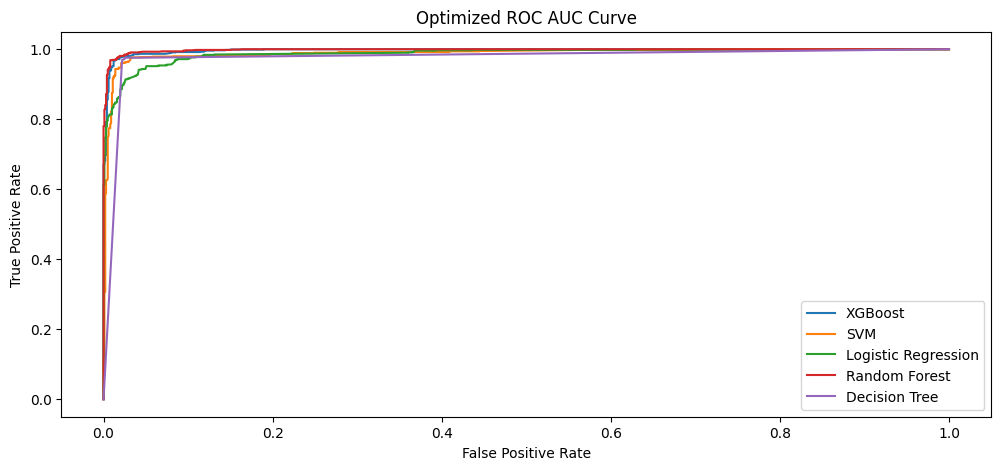

In [64]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# plot ROC curves
plt.figure(figsize=(12,5))
plt.title('Optimized ROC AUC Curve')
plt.plot(xgb_fpr, xgb_tpr,label='XGBoost')
plt.plot(svm_fpr, svm_tpr,label='SVM')
plt.plot(logi_fpr, logi_tpr,label='Logistic Regression')
plt.plot(rf_fpr, rf_tpr,label='Random Forest')
plt.plot(dt_fpr, dt_tpr,label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()